In [128]:
# importing our libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


### 1. Data Injection

In [ ]:
# Loading our datasets

possumss = pd.read_csv("possum.csv")
possumss.head()


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [60]:
# Creating a copy
possums = possumss.copy()

### 2. PDA (Preliminry data Analysis)

In [61]:
# Let's get the shape of our datasets


print(f"Shape : {possums.shape}")


Shape : (104, 14)


In [62]:
possums.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [63]:
possums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [64]:
possums.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [92]:
possums['age']=possums['age'].round()

In [93]:
possums['age'].value_counts().round(2)

age
3.0    27
4.0    16
2.0    16
5.0    13
6.0    12
1.0    10
7.0     7
9.0     2
8.0     1
Name: count, dtype: int64

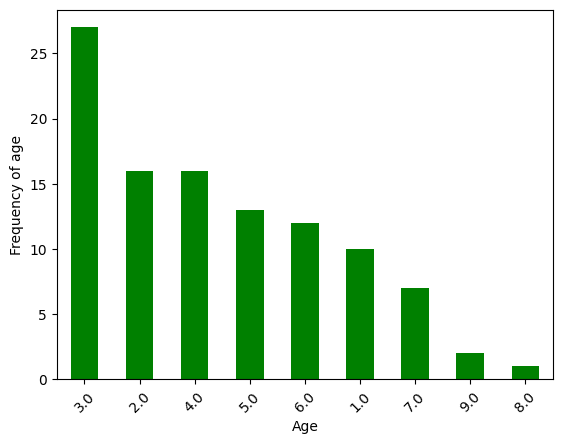

In [94]:
# Let's visualize this 
possums['age'].sort_values(ascending=False).value_counts().plot(kind='bar',color='green')
plt.xlabel('Age')
plt.ylabel('Frequency of age')
plt.xticks(rotation=45)
plt.show()

#### Cleaning our datasets

In [95]:
possums.isnull()
possums.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

It can be seen that the age has 2 null values and the footlength has 2 null values . Filling both with their means.

In [ ]:
# Filling missing values

possums['age'].fillna(possums['age'].mean(),inplace=True)
possums.isna().sum()

In [ ]:

possums['footlgth'].fillna(possums['footlgth'].mean(),inplace=True)
possums.isna().sum()

In [78]:
possums.shape

(104, 14)

In [79]:
possums.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [80]:
print(possums.duplicated().sum())

0


There are no duplicated values 

In [81]:
# Lets check our unique sets

possums.nunique()

case        104
site          7
Pop           2
sex           2
age          10
hdlngth      71
skullw       64
totlngth     34
taill        19
footlgth     76
earconch     69
eye          35
chest        19
belly        24
dtype: int64

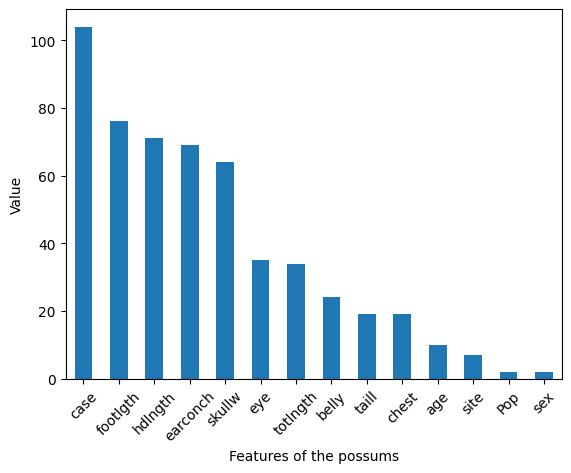

In [83]:
# Let's visualize this 
possums.nunique().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features of the possums')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [96]:
# Let's get the information about our datasets

possums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


#### 4. DDA. Descriptive Data Analysis

In [84]:
# Let's get the statistical description of our datasets

possums.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.890617,3.573349,3.113426,4.310549,1.959518,4.373917,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.750000,90.675000,54.975000,84.000000,35.875000,64.650000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.100000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


#### Let's sort our data into male,female and perform some analysis .

In [112]:
possums['sex'].value_counts()

sex
m    61
f    43
Name: count, dtype: int64

There are 61 males and 43 females in our data

In [107]:
# Let's sort our data into male,female and perform some analysis .

male = possums[possums['sex'] == 'm']
female = possums[possums['sex'] == 'f']



In [108]:
male.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
12,13,1,Vic,m,5.0,95.1,59.9,89.5,36.0,71.0,49.8,15.8,27.0,32.0
13,14,1,Vic,m,3.0,95.4,57.6,91.5,36.0,74.3,53.7,15.1,28.0,31.5
14,15,1,Vic,m,5.0,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0


In [110]:
# Let's get the average, median , and standard deviation and derive our insights

male.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,58.901639,4.081967,3.737705,92.922951,57.091803,86.511475,36.942623,68.009836,47.816393,15.211475,26.762295,32.377049
std,28.639544,2.347304,1.861018,4.126354,3.451777,4.339896,2.057706,3.981905,3.994587,1.041169,2.161417,2.642057
min,1.000000,1.000000,1.000000,82.500000,50.000000,76.000000,32.000000,62.000000,41.700000,12.800000,22.000000,27.000000
25%,35.000000,2.000000,2.000000,90.700000,54.800000,84.000000,35.500000,64.500000,44.800000,14.500000,25.000000,30.500000
50%,59.000000,4.000000,3.000000,93.200000,56.300000,86.000000,36.500000,66.900000,46.400000,15.000000,27.000000,32.000000
75%,84.000000,6.000000,5.000000,95.400000,59.000000,89.500000,38.000000,71.500000,51.800000,15.900000,28.000000,35.000000
max,103.000000,7.000000,8.000000,103.100000,68.600000,96.000000,43.000000,75.000000,56.200000,17.800000,32.000000,38.000000


In [109]:
female.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0


In [111]:
female.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,43.418605,2.976744,3.976744,92.148837,56.588372,87.906977,37.104651,69.096726,48.576744,14.811628,27.337209,32.883721
std,30.264888,2.219914,1.945549,2.574913,2.568788,4.182241,1.830815,4.853521,4.274444,1.030074,1.841069,2.929402
min,2.000000,1.000000,1.000000,84.700000,51.500000,75.000000,32.000000,60.300000,40.300000,13.000000,23.000000,25.000000
25%,18.000000,1.000000,3.000000,90.750000,55.200000,85.250000,36.000000,64.900000,44.650000,14.100000,26.000000,31.250000
50%,40.000000,2.000000,4.000000,92.500000,56.400000,88.500000,37.500000,70.300000,50.800000,14.800000,28.000000,33.000000
75%,64.500000,5.000000,5.000000,93.800000,57.650000,90.500000,38.250000,72.800000,52.300000,15.450000,28.500000,34.000000
max,104.000000,7.000000,9.000000,96.900000,67.700000,96.500000,41.000000,77.900000,53.900000,17.400000,31.000000,40.000000


**Male and Female Possums age Statistical Comparison**

| Metric      | age of male  | age of female   | Difference Means                       |
|-------------|--------------|---------------|---------------------------------------|
| **Average** | 3.737705  | 3.976744 | Female group has a bigger average than the male,this shows that female possums tend to be slightly older than male  |
| **std**  | 1.861018 | 1.945549 | There is a slighlty greater variation from the mean by the female possums              |
| **min**   | 	1.000000| 1.000000 | Same minimum value   
| **max**   | 	8.000000| 9.000000 | Female possums have a higher age on max  
| **25%**   | 	2.000000| 3.000000 | 25% of the ages fall under this
| **50% or Median**   | 	3.000000|4.000000 |This is the median for the ages, 50% of ages fall under this and 50% are more 
| **75%**   | 	3.0000000| 5.000000 | 75% of the ages are below this and 25% are above this age         |



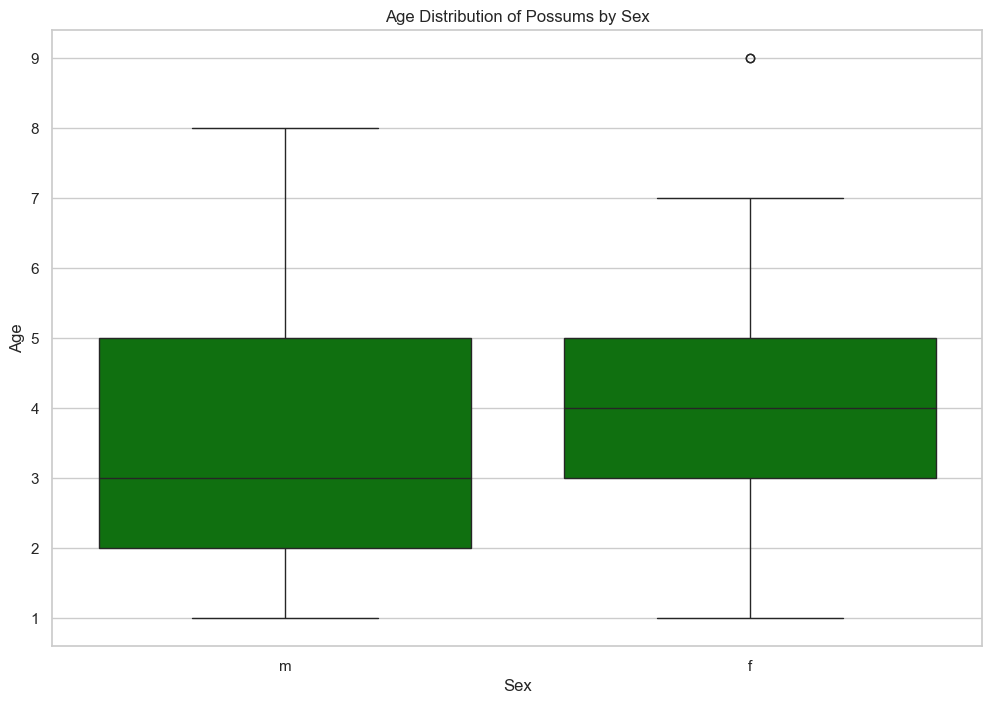

In [ ]:
# Let's visualize this

plt.figure(figsize=(12, 8))
sns.boxplot(data=possums, x='sex', y='age',color='green')

plt.title('Age Distribution of Possums by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


**Male and Female Possums tail Statistical Comparison**

| Metric      | tail of male  | tail of female   | Difference Means                       |
|-------------|--------------|---------------|---------------------------------------|
| **Average** | 36.942623  |	37.104651 | Female group has a bigger average than the male,this shows that female possums tails tend to be slightly longer than male tails  |
| **std**  | 2.057706 |1.830815	 | There is a slighlty greater variation from the mean by the male possums              |
| **min**   | 	32.000000| 	32.000000 | Same minimum value   
| **max**   | 		43.000000| 41.00000 | Male possums have  longer tails on max  
| **25%**   | 		35.500000| 36.000000 | 25% of the tails fall under this
| **50% or Median**   | 		36.500000|37.500000 |This is the median for the tails, 50% of tails fall under this and 50% are more 
| **75%**   | 	38.000000| 38.250000 | 75% of the tails are below this and 25% are above this          |

In [149]:
# # Let's visualize this using histogram

# sns.histplot(data=possums,x='age',hue='sex',bins = 10,kde=True,alpha = 0.05)

#### **Measures of Center**

In [99]:

print("Age of possums:")
print(f"    Mean: {possums['age'].mean():.1f} years")
print(f"    Mode: {possums['age'].mode()} years")
print(f"    Median: {possums['age'].median():.1f} years")
print(f"    Standard Deviation: {possums['age'].std():.1f} years")

Age of possums:
    Mean: 3.8 years
    Mode: 0    3.0
Name: age, dtype: float64 years
    Median: 3.0 years
    Standard Deviation: 1.9 years


From the above:

Age of possums:

Mean: 3.8 years

Mode: 3 years

Median: 3.0 years

Standard Deviation: 1.9 years



#### This shows that the average age of possums is 3.8 years. The median which is 3 years shows the typical age of the possums, the age 3 which is the mode is the age with highest occurence. The standard deviation of 1.9 shows very little variation. Which shows that ages of the possums are close to that of the mean or the average .

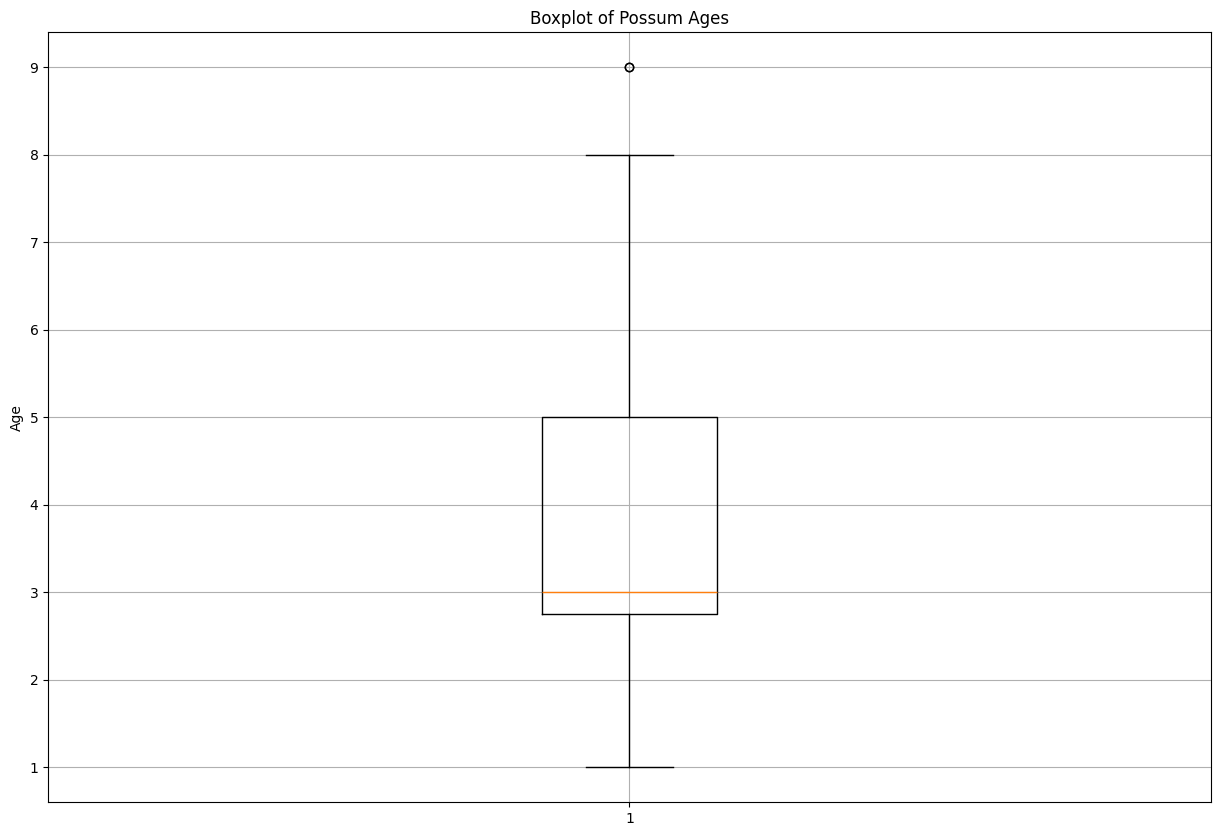

In [114]:

fig, ax = plt.subplots(figsize=(15, 10))
ax.boxplot(possums['age'].dropna())  
ax.set_title('Boxplot of Possum Ages')
ax.set_ylabel('Age')
ax.grid(True)

plt.show()


### **Measures of Spread**

In [154]:
# Let's calculate measures of spread of the age
# Mean

mean_value = possums['age'].mean()

print(round(mean_value))


4


In [155]:
# Variance

variance_value = possums['age'].var(ddof=0)
print(round(variance_value))

4


In [156]:
# Standard Deviation
std_dev_value = possums['age'].std(ddof=0)
print(round(std_dev_value))

2


In [157]:
# Relative spread (Coefficient of Variation)

cv = std_dev_value / mean_value
cv_percent = cv * 100




print("Coefficient of Variation (CV):", cv)
print("Relative Spread (% of mean):", round(cv_percent), "%")


Coefficient of Variation (CV): 0.49045384232482503
Relative Spread (% of mean): 49 %


### Interpretation

This means that the standard deviation is 49% of the mean. This indicates a noticeaable variation in ages with respect to the average age of the possums.

**Emperical Interpretation**

k = number of standard deviation

1sd = 2

2sd = 4

3sd = 8




| % of dataset | No. of SD| Min (Mean − SD×k) | Max (Mean + SD×k) | Interpretation                          |
| ------------ | ---------| ----------------- | ----------------- | ----------------------------------------|
| \~68%        | 1 s.d    | 2                | 6               | Most ages fall here                 |
| \~95%        | 2 s.d    | -4                |   12              | Few ages are outside this range         |
| \~99.7%      | 3 s.d    | -20                | 28              |Almost every possums is within this range     |

#### **Percentiles, Interquartile range (IQR), and Outlier detection**

In [163]:
age = possums['age']

# Quartiles

q1= np.quantile(age, 0.25)
q2 = np.quantile(age, 0.50)
q3 = np.quantile(age, 0.75)

print(f"Q1 - {q1}")
print(f"Q2 - {q2}")
print(f"Q3 - {q3}")

Q1 - 2.75
Q2 - 3.0
Q3 - 5.0


**Interpretation**
**Q1(0.25 quantile or 25% percentile)**

This shows that 25% of possums ages fall below 2.75, and 75% of their ages is above 2.75


**Q2(0.50 quantile or 50% percentile)**

This shows the median of the possums ages. 50% of the ages are below this and 50% are above this.



**Q1(0.75 quantile or 75% percentile)**

This shows that 75% of possums ages fall below 5.0, and 25% of their ages is above 5.0.



**Interquartile Range**


In [164]:
IQR = q3 - q1
print(f"IQR - {IQR}")

IQR - 2.25


**OUTLIERS**

In [165]:
# Outliers thresholds 

lower_bounds = q1 - 1.5 * IQR
higher_bounds = q3 + 1.5 * IQR


print(f"Lower bound - {lower_bounds}")
print(f"Upper bound - {higher_bounds}")

Lower bound - -0.625
Upper bound - 8.375


**Interpretation**

This means that any values below -0.625 or any values above 8.375 are **Outliers**

**Let's detect the age outliers**


In [173]:
outliers = age[(age < lower_bounds) | (age > higher_bounds)]
outliers
# print(f"List of outlier ages : {outliers}")

8     9.0
10    9.0
Name: age, dtype: float64

This shows there two outliers in our age . 9 years and 9 years are our outliers.

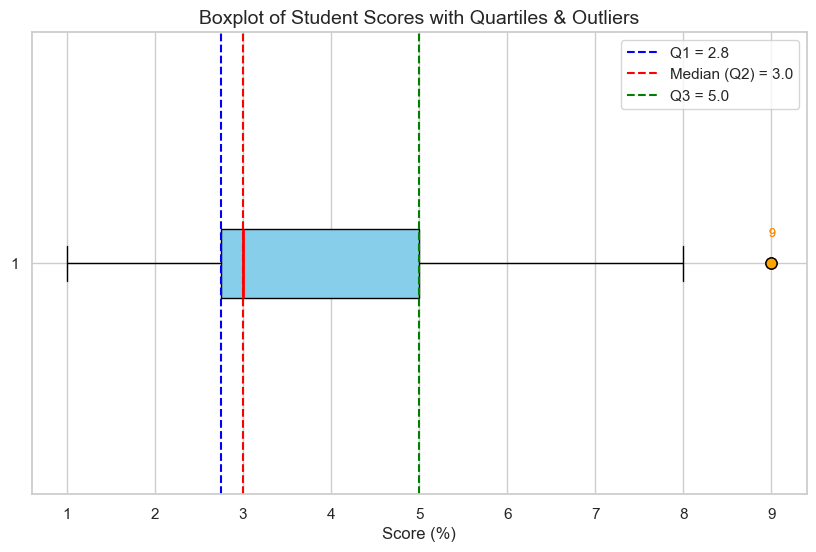

Q1 (25th percentile): 2.75
Q2 (Median, 50th percentile): 3.00
Q3 (75th percentile): 5.00
IQR (Q3 - Q1): 2.25
Lower Bound for Outliers: -0.62
Upper Bound for Outliers: 8.38
Outliers Detected: [9.0, 9.0]


In [177]:

plt.figure(figsize=(10, 6))
box = plt.boxplot(age, vert=False, patch_artist=True,
                  boxprops=dict(facecolor="skyblue", color="black"),
                  medianprops=dict(color="red", linewidth=2),
                  whiskerprops=dict(color="black"),
                  capprops=dict(color="black"),
                  flierprops=dict(markerfacecolor="orange", marker='o', markersize=8, linestyle="none"))

# Annotate Quartiles
plt.axvline(q1, color="blue", linestyle="--", label=f"Q1 = {q1:.1f}")
plt.axvline(q2, color="red", linestyle="--", label=f"Median (Q2) = {q2:.1f}")
plt.axvline(q3, color="green", linestyle="--", label=f"Q3 = {q3:.1f}")

# Annotate outliers if present
for outlier in outliers:
    plt.text(outlier, 1.05, f"{outlier:.0f}", ha="center", va="bottom", color="darkorange", fontsize=9)

# Titles and labels
plt.title("Boxplot of Student Scores with Quartiles & Outliers", fontsize=14)
plt.xlabel("Score (%)")
plt.legend()

plt.show()

# Print results
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Q2 (Median, 50th percentile): {q2:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print(f"IQR (Q3 - Q1): {IQR:.2f}")
print(f"Lower Bound for Outliers: {lower_bounds:.2f}")
print(f"Upper Bound for Outliers: {higher_bounds:.2f}")
print(f"Outliers Detected: {list(outliers)}")


**Skewness**



In [189]:
from scipy.stats import norm, skew, kurtosis

skewness = skew(age)
print(f"Skewness: {skewness}")

# Interpretation

if skewness > 0 :
    print("The distribution is positively skewed")
elif skewness < 0:
    print("The distribution is negatively skewed")

else:
    print("The distribution is symetric")

Skewness: 0.5311656388310628
The distribution is positively skewed
